<a href="https://colab.research.google.com/github/yohanesnuwara/open-geoscience-repository/blob/master/how_to_access_gdr_openei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial: Access the Geothermal Data Repository (GDR) OpenEI

> (Yohanes Nuwara, [ign.nuwara97@gmail.com](ign.nuwara97@gmail.com))

We will use the Utah FORGE data (gravity, magnetotelluric, heat flow, seismic, and well logging) available in GDR OpenEI in this tutorial. 

In this tutorial we will learn how to:

* Download data from a webpage using `!wget`
* Unzip `.ZIP` files directly from the downloaded data to our working directory here
* Convert text `.TXT` and `.CSV` spreadsheet data to a Dataframe.
* Open a shapefile `.SHP` and display it.
* Open some geoscience data formats, e.g. `.LAS` well-log data files and `.SGY` or `.SEGY` seismic data files

Let's get started!

First, we need to import these three very important libraries: `numpy`, `matplotlib`, and `numpy`

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The meaning of for instance `import pandas as pd` is to rename our imported library `pandas` to a new abbreviated name `pd`. So, later when we use a certain module from `pandas`, for instance `read_csv`, we run this code: `pd.read_csv(...)`

> Note: this importing style optional. We could just run: `import pandas`. But, when we import the module as it was mentioned above, we have to run this code: `pandas.read_csv(...)` instead of `pd.read_csv(...)`

# Utah FORGE Project dataset

## Gravity (Tutorial: Unzipping `.ZIP` and Processing `.TXT` or `.CSV` spreadsheet to a Dataframe)

We need to download a gravity dataset from Utah FORGE project from this [link](https://gdr.openei.org/submissions/1144). Let's use `!wget`

In [0]:
!wget https://gdr.openei.org/files/1144/'FORGE_3D_gravity%20(1).zip'

--2020-05-09 07:52:34--  https://gdr.openei.org/files/1144/FORGE_3D_gravity%20(1).zip
Resolving gdr.openei.org (gdr.openei.org)... 44.225.86.230, 52.27.85.213, 52.11.176.65
Connecting to gdr.openei.org (gdr.openei.org)|44.225.86.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11786437 (11M) [application/octet-stream]
Saving to: ‘FORGE_3D_gravity (1).zip’

FORGE_3D_gravity (1 100%[===================>]  11.24M  8.08MB/s    in 1.4s    

2020-05-09 07:52:36 (8.08 MB/s) - ‘FORGE_3D_gravity (1).zip’ saved [11786437/11786437]



The file is in `.ZIP` format. Therefore, we need to unzip or extract the files, using `!unzip`

`!unzip '... web URL ...' -d '... to destination folder ...'`

In [0]:
!unzip '/content/FORGE_3D_gravity (1).zip' -d '/content/forge3d'

Archive:  /content/FORGE_3D_gravity (1).zip
   creating: /content/forge3d/FORGE_3D_gravity/
  inflating: /content/forge3d/FORGE_3D_gravity/UtahFORGE_3D_Gravity_Models_May2019.geoh5.lock  
   creating: /content/forge3d/__MACOSX/
   creating: /content/forge3d/__MACOSX/FORGE_3D_gravity/
  inflating: /content/forge3d/__MACOSX/FORGE_3D_gravity/._UtahFORGE_3D_Gravity_Models_May2019.geoh5.lock  
  inflating: /content/forge3d/FORGE_3D_gravity/.DS_Store  
  inflating: /content/forge3d/__MACOSX/FORGE_3D_gravity/._.DS_Store  
  inflating: /content/forge3d/FORGE_3D_gravity/UtahFORGE_3D_Gravity_Modelling_Report_May2019.pdf  
  inflating: /content/forge3d/__MACOSX/FORGE_3D_gravity/._UtahFORGE_3D_Gravity_Modelling_Report_May2019.pdf  
  inflating: /content/forge3d/FORGE_3D_gravity/FORGE_2C_finalCBGA.txt  
  inflating: /content/forge3d/__MACOSX/FORGE_3D_gravity/._FORGE_2C_finalCBGA.txt  
  inflating: /content/forge3d/FORGE_3D_gravity/FORGE_2C_finalCBGA.xls  
  inflating: /content/forge3d/__MACOSX/FORG

Having been already extracted in a new folder `forge3d`, we now see the content by using `ls '... path ...'`

In [0]:
ls '/content/forge3d/FORGE_3D_gravity'

DensityModel_Modified_Top_Granite/
DensityModel_Original_Top_Granite/
FORGE_2C_finalCBGA.txt*
FORGE_2C_finalCBGA.xls*
UtahFORGE_3D_Gravity_Modelling_Report_May2019.pdf*
UtahFORGE_3D_Gravity_Models_May2019.geoh5*
UtahFORGE_3D_Gravity_Models_May2019.geoh5.lock*


`ls` again to see what's inside the folder `DensityModel_Original_Top_Granite`

In [0]:
ls '/content/forge3d/FORGE_3D_gravity/DensityModel_Original_Top_Granite'

UtahFORGE_1_Original_Top_Granite_Density_Model.csv*
UtahFORGE_1_Original_Top_Granite_Density_Model_MISFIT.csv*


There are two kinds of data present in this `FORGE_3D_gravity` folder. The first one is **Complete Bouguer Gravity Anomaly (CBGA)** as a file `FORGE_2C_finalCBGA.txt`, and the second one is **Top Granite Density Model** as a file `UtahFORGE_1_Original_Top_Granite_Density_Model.csv`. Both has different formats, `.TXT` and `.CSV`. Next, we will use `pandas` to open both file formats!

### Bouguer Anomaly Data

Our `pandas` has been imported as `pd` in the very first part of this whole tutorial. We use the `read_csv` module from `pandas` to open a `.TXT` file. This will be also applied to a `.CSV` file.

The `.TXT` file that we'd like to open is: `FORGE_2C_finalCBGA.txt`

Carefully look at the following code. It has `delimiter = "\t"` inside the `pd.read_csv(...)`. A delimiter is needed because each data is started with a column details (`name`, `lon`, `lat`, etc.) and separated by a `space`. This will help `pandas` to identify this structure. 

In [0]:
df = pd.read_csv('/content/forge3d/FORGE_3D_gravity/FORGE_2C_finalCBGA.txt', delimiter = "\t")
df

,name,lon,lat,HAE,Easting,Northing,NGVD29,NAVD88,obs,errg,iztc,oztc,gFA,gSBGA,gCBGA
0,F1,-112.954594,38.468200,1535.440,329482,4259574,1555.156,1556.9772,979513.874,0.001,0.000,1.047,-473.837,-218.296,-217.249
1,FGA001,-112.889290,38.500136,1655.900,335252,4262999,1675.298,1677.1564,979505.948,0.001,0.000,1.594,-511.011,-205.347,-203.753
2,FGA002,-112.892165,38.500084,1645.318,335002,4262998,1664.734,1666.5895,979507.258,0.002,0.000,1.598,-507.745,-206.113,-204.515
3,FGA003,-112.892092,38.497834,1648.489,335003,4262749,1667.905,1669.7617,979506.507,0.001,0.000,1.880,-508.724,-206.042,-204.162
4,FGA004,-112.892037,38.495588,1652.214,335003,4262499,1671.631,1673.4880,979505.443,0.001,0.000,2.614,-509.873,-206.176,-203.562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,FGB292,-112.852645,38.523257,1783.176,338500,4265500,1803.079,1804.2324,979493.119,0.001,0.000,2.312,-550.288,-195.184,-192.872
514,FGB293,-112.875585,38.522912,1667.975,336499,4265502,1688.012,1689.1459,979512.036,0.001,0.004,1.513,-514.737,-198.891,-197.374
515,FGB294,-112.898498,38.522542,1586.894,334501,4265502,1607.063,1608.1800,979520.016,0.001,0.000,1.611,-489.715,-206.823,-205.212
516,FGB295,-112.921386,38.522146,1536.967,332504,4265500,1557.248,1558.3505,979525.400,0.001,0.000,1.376,-474.308,-211.222,-209.846


Now, we have successfully open our very first `.TXT` file using `pandas`.

### Top Granite Surface

Next, we will open a `.CSV` format file of `UtahFORGE_2_Modified_Top_Granite_Density_Model.csv`. We will again use `pd.read_csv(...)`, but now the following code becomes much simpler, why? Because, a `.CSV` file contains a **comma-separated structure** (`,`) and the module `read_csv` has been specified to identify this comma-separated structure. So, we don't need to give a delimiter as it was in the previous `.TXT` file.

In [0]:
df = pd.read_csv('/content/forge3d/FORGE_3D_gravity/DensityModel_Modified_Top_Granite/UtahFORGE_2_Modified_Top_Granite_Density_Model.csv')
df

,X_UTMNAD83z12_m,Y_UTMNAD83z12_m,Z_Elevation_m,Density_gcm3
0,331925,4259925,1275,2.42
1,331925,4259925,1305,2.42
2,331925,4259925,1335,2.42
3,331925,4259925,1365,2.42
4,331925,4259925,1395,2.42
...,...,...,...,...
268768,340100,4265150,1650,2.64
268769,340100,4265150,1710,2.64
268770,340100,4265150,1770,2.64
268771,340100,4265150,1830,2.64


Finally, we have successfully opened the `.CSV` file. 

## Magnetotelluric Data (Processing unstructured `.TXT` file)

Now, comes to the next challenge! The following MT dataset is in fact in `.TXT` format, but it contains a complicating structure. We'll see this later on. 

First, let's download the data from the given URL. 

In [1]:
!wget https://gdr.openei.org/files/712/MilfordMT_raw.zip

--2020-05-10 10:01:07--  https://gdr.openei.org/files/712/MilfordMT_raw.zip
Resolving gdr.openei.org (gdr.openei.org)... 44.225.86.230, 52.11.176.65, 52.27.85.213
Connecting to gdr.openei.org (gdr.openei.org)|44.225.86.230|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96364 (94K) [application/octet-stream]
Saving to: ‘MilfordMT_raw.zip’

MilfordMT_raw.zip   100%[===================>]  94.11K   310KB/s    in 0.3s    

2020-05-10 10:01:08 (310 KB/s) - ‘MilfordMT_raw.zip’ saved [96364/96364]



Then, unzip it, and store it in a new folder `magnetotelluric` inside our `forge3d` folder.

In [3]:
!unzip '/content/MilfordMT_raw.zip' -d '/content/forge3d/magnetotelluric'

Archive:  /content/MilfordMT_raw.zip
  inflating: /content/forge3d/magnetotelluric/MT_readme.txt  
  inflating: /content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt  


We will open `Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt` magnetotelluric data. This `.TXT` file contains MT data from 15 MT stations, so the the data are stacked in one file. Hence, we need to pre-process the data.

We will again use `pd.read_csv(...)`. Again, we add `delimiter=" "` to identify the `space` between data. 

Since the 15 MT stations are stacked in one file, we have to separate those. So, we have to add `skiprows` and `nrows`. 

In the following, `mt1`, `mt2`, `mt3`, ..., `mt17` represents the separated data of each station. 

In [0]:
mt1 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=6, nrows=35, delimiter = " ")
mt2 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=46, nrows=34, delimiter = " ")
mt3 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=86, nrows=34, delimiter = " ")
mt4 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=126, nrows=34, delimiter = " ")
mt5 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=166, nrows=34, delimiter = " ")
mt6 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=206, nrows=34, delimiter = " ")
mt7 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=246, nrows=34, delimiter = " ")
mt8 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=286, nrows=34, delimiter = " ")
mt9 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=326, nrows=34, delimiter = " ")
mt10 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=366, nrows=34, delimiter = " ")
mt11 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=406, nrows=34, delimiter = " ")
mt12 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=446, nrows=34, delimiter = " ")
mt13 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=486, nrows=34, delimiter = " ")
mt14 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=526, nrows=66, delimiter = " ")
mt15 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=598, nrows=66, delimiter = " ")
mt16 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=675, nrows=66, delimiter = " ")
mt17 = pd.read_csv('/content/forge3d/magnetotelluric/Task_1_3_3_Hardwick_03_09_2016_MT_v1.txt', skiprows=751, nrows=66, delimiter = " ")

We could then create a dataframe using `pd.DataFrame` to create a table that tells us the name of the stations corresponding to each of the separated data `mt...` above, also we list the UTM coordinates (Easting and Northing) of each station

In [9]:
df_name = np.array(['mt1', 'mt2', 'mt3', 'mt4', 'mt5', 'mt6', 'mt7', 'mt8', 'mt9', 'mt10', 'mt11', 'mt12', 'mt13', 'mt14', 'mt15', 'mt16', 'mt17'])
site = np.array(['118', '119', '120', '132', '133', '134', '135', '136', '137', '138', '139', '140', '151', 'RHS003', 'RHS004', 'RHS005', 'RHS006'])

utm_east = np.array([mt1['UTMeast'].iloc[0], mt2['UTMeast'].iloc[0], mt3['UTMeast'].iloc[0], mt4['UTMeast'].iloc[0], mt5['UTMeast'].iloc[0],
          mt6['UTMeast'].iloc[0], mt7['UTMeast'].iloc[0], mt8['UTMeast'].iloc[0], mt9['UTMeast'].iloc[0], mt10['UTMeast'].iloc[0],
          mt11['UTMeast'].iloc[0], mt12['UTMeast'].iloc[0], mt13['UTMeast'].iloc[0], mt14['UTMeast'].iloc[0], mt15['UTMeast'].iloc[0],
          mt16['UTMeast'].iloc[0], mt17['UTMeast'].iloc[0]]).astype(np.float)

utm_north = np.array([mt1['UTMnorth'].iloc[0], mt2['UTMnorth'].iloc[0], mt3['UTMnorth'].iloc[0], mt4['UTMnorth'].iloc[0], mt5['UTMnorth'].iloc[0],
          mt6['UTMnorth'].iloc[0], mt7['UTMnorth'].iloc[0], mt8['UTMnorth'].iloc[0], mt9['UTMnorth'].iloc[0], mt10['UTMnorth'].iloc[0],
          mt11['UTMnorth'].iloc[0], mt12['UTMnorth'].iloc[0], mt13['UTMnorth'].iloc[0], mt14['UTMnorth'].iloc[0], mt15['UTMnorth'].iloc[0],
          mt16['UTMnorth'].iloc[0], mt17['UTMnorth'].iloc[0]]).astype(np.float)

desc = pd.DataFrame({'Name': df_name, 'Site': site, 'UTM_Easting': utm_east, 'UTM_Northing': utm_north})
desc

,Name,Site,UTM_Easting,UTM_Northing
0,mt1,118,333608.000,4292084.0
1,mt2,119,331322.000,4288668.0
2,mt3,120,337359.000,4288187.0
3,mt4,132,341017.000,4285313.0
4,mt5,133,338852.000,4282518.0
5,mt6,134,334933.000,4284895.0
6,mt7,135,332242.000,4280848.0
7,mt8,136,330434.000,4284430.0
8,mt9,137,326600.000,4282426.0
9,mt10,138,329941.000,4277811.0


Using this table, we could select any MT station to display, for example station `135`, which the name of the data is `mt7`. Display the data of the first 5 rows with `mt7.head(5)`

In [10]:
print('Magnetotelluric data from Station 135 \n')
# print one of the dataframes (first 5 rows using head)
mt7.head(5)

Magnetotelluric data from Station 135 



,UTMeast,UTMnorth,Elev,Freq,Rhoxx,RhoxxErr,Phsxx,PhsxxErr,Rhoxy,RhoxyErr,Phsxy,PhsxyErr,Rhoyx,RhoyxErr,Phsyx,PhsyxErr,Rhoyy,RhoyyErr,Phsyy,PhsyyErr,ZxxRe,ZxxIm,ZxxErr,ZxyRe,ZxyIm,ZxyErr,ZyxRe,ZyxIm,ZyxErr,ZyyRe,ZyyIm,ZyyErr,TxRe,TxIm,TxErr,TyRe,TyIm,TyErr
0,332242.0,4280848.0,1519,200.0,0.001970,0.035450,-26.57,2.34,20.19,0.003788,63.33,0.25,20.15,0.003788,-117.31,0.25,0.17660,0.003939,57.48,0.26,0.001577,-0.000789,1.729622e-09,0.080146,0.159560,2.023343e-07,-0.081842,-0.158498,2.019335e-07,0.008978,0.014081,1.914215e-09,-0.005,0.006,0.004,0.011,0.000,0.004
1,332242.0,4280848.0,1519,150.0,0.008119,0.010300,-64.96,0.68,17.71,0.003788,62.74,0.25,17.86,0.003788,-117.58,0.25,0.12380,0.003939,58.94,0.26,0.001312,-0.002809,4.514762e-10,0.066335,0.128742,1.331107e-07,-0.067336,-0.128912,1.342381e-07,0.006247,0.010373,1.006426e-09,-0.005,0.004,0.004,0.006,-0.001,0.004
2,332242.0,4280848.0,1519,100.0,0.011130,0.003939,-130.85,0.26,16.28,0.003788,62.25,0.25,16.28,0.003788,-117.96,0.25,0.09248,0.003939,59.40,0.26,-0.001939,-0.002242,6.032052e-11,0.052790,0.100337,8.157510e-08,-0.053157,-0.100142,8.157510e-08,0.004350,0.007355,5.012077e-10,-0.005,0.002,0.004,0.003,-0.002,0.004
3,332242.0,4280848.0,1519,75.0,0.008854,0.003939,-127.59,0.26,13.60,0.003788,62.34,0.25,13.82,0.003788,-117.87,0.25,0.08136,0.003939,59.07,0.26,-0.001397,-0.001814,3.598908e-11,0.041660,0.079486,5.110971e-08,-0.042289,-0.079972,5.193648e-08,0.003568,0.005954,3.307060e-10,-0.004,0.001,0.004,0.004,-0.003,0.004
4,332242.0,4280848.0,1519,50.0,0.008579,0.003939,-126.48,0.26,12.43,0.003788,62.52,0.25,12.61,0.003788,-117.70,0.25,0.07428,0.003939,59.33,0.26,-0.001094,-0.001480,2.324752e-11,0.032324,0.062147,3.114185e-08,-0.032798,-0.062470,3.159281e-08,0.002762,0.004658,2.012852e-10,-0.004,0.000,0.004,0.006,-0.004,0.004


## Heat Flow Shapefile (Open `.SHP` shapefile)

Shapefile with format `.SHP` is often used in geoscience. As an example of a shapefile, we will download a heat flow data from the following URL. 

In [11]:
!wget https://gdr.openei.org/files/714/Heatflow_Contours.zip

--2020-05-10 10:21:32--  https://gdr.openei.org/files/714/Heatflow_Contours.zip
Resolving gdr.openei.org (gdr.openei.org)... 52.11.176.65, 52.27.85.213, 44.225.86.230
Connecting to gdr.openei.org (gdr.openei.org)|52.11.176.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21507 (21K) [application/octet-stream]
Saving to: ‘Heatflow_Contours.zip’

Heatflow_Contours.z 100%[===================>]  21.00K  --.-KB/s    in 0s      

2020-05-10 10:21:33 (225 MB/s) - ‘Heatflow_Contours.zip’ saved [21507/21507]



Then unzip it. 

In [12]:
!unzip '/content/Heatflow_Contours.zip' -d '/content/forge3d/heatflow'

Archive:  /content/Heatflow_Contours.zip
  inflating: /content/forge3d/heatflow/Heatflow_Contours.shp.xml  
  inflating: /content/forge3d/heatflow/Heatflow_Contours.shx  
  inflating: /content/forge3d/heatflow/Heatflow_Contours.dbf  
  inflating: /content/forge3d/heatflow/Heatflow_Contours.prj  
  inflating: /content/forge3d/heatflow/Heatflow_Contours.sbn  
  inflating: /content/forge3d/heatflow/Heatflow_Contours.sbx  
  inflating: /content/forge3d/heatflow/Heatflow_Contours.shp  


As we see, there is a shapefile `Heatflow_Contours.shp` inside the heat flow folder. We will use a library called `geopandas` to open an `.SHP` file. 

In [13]:
!pip install geopandas

     |████████████████████████████████| 931kB 7.8MB/s 
     |████████████████████████████████| 10.9MB 29.1MB/s 
     |████████████████████████████████| 14.7MB 260kB/s 


In [0]:
import geopandas as gpd

To read the `Heatflow_Contours.shp`, it is very straightforward. 

In [0]:
gdf = gpd.read_file('/content/forge3d/heatflow/Heatflow_Contours.shp')

Then, we could see what's inside the shapefile

In [16]:
gdf.head()

,Classes,Value,Shape_Leng,Shape_Le_1,geometry
0,1,100.0,0.819992,0.0,"MULTILINESTRING ((332557.000 4271171.400, 3324..."
1,2,250.0,1.012844,0.0,"MULTILINESTRING ((322444.700 4265099.600, 3224..."
2,3,500.0,0.278691,0.0,"MULTILINESTRING ((338522.500 4257759.500, 3383..."
3,4,750.0,0.214172,0.0,"LINESTRING (337139.900 4262900.300, 337137.900..."
4,5,1500.0,0.024041,0.0,"LINESTRING (338176.000 4261403.700, 338060.900..."


As we see above, column `Value` gives us the heat flow. We could then plot the heat flow contours using `geopandas plot`. 

`gdf.plot(column='Value')` gives us contours with color attribute corresponding to the heat flow column `Value`. We could just use `gdf.plot()`, but the contours won't appear with the attributed color. 

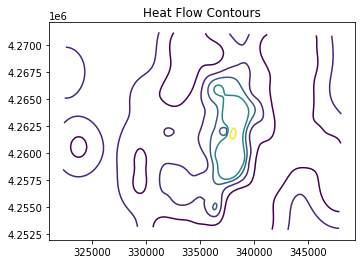

In [25]:
gdf.plot(column='Value')
plt.title('Heat Flow Contours')
plt.show()

## 2D Seismic (Open `.SGY` or `.SEGY` seismic data)

In [0]:
!wget https://gdr.openei.org/files/'1141/2018-19%20Reflection%20Processing.zip'

--2020-05-09 08:22:10--  https://gdr.openei.org/files/1141/2018-19%20Reflection%20Processing.zip
Resolving gdr.openei.org (gdr.openei.org)... 52.27.85.213, 44.225.86.230, 52.11.176.65
Connecting to gdr.openei.org (gdr.openei.org)|52.27.85.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 885987763 (845M) [application/octet-stream]
Saving to: ‘2018-19 Reflection Processing.zip’

2018-19 Reflection  100%[===================>] 844.94M  19.3MB/s    in 45s     

2020-05-09 08:22:56 (18.6 MB/s) - ‘2018-19 Reflection Processing.zip’ saved [885987763/885987763]



In [0]:
!unzip '/content/2018-19 Reflection Processing.zip' -d '/content/forge3d/seismic'

Archive:  /content/2018-19 Reflection Processing.zip
   creating: /content/forge3d/seismic/2018-19 Reflection Processing/
file #2:  bad zipfile offset (local header sig):  76
file #3:  bad zipfile offset (local header sig):  441
file #4:  bad zipfile offset (local header sig):  496
file #5:  bad zipfile offset (local header sig):  581
file #6:  bad zipfile offset (local header sig):  745
file #7:  bad zipfile offset (local header sig):  831
file #8:  bad zipfile offset (local header sig):  132812969
file #9:  bad zipfile offset (local header sig):  132813064
file #10:  bad zipfile offset (local header sig):  132813353
file #11:  bad zipfile offset (local header sig):  135321274
file #12:  bad zipfile offset (local header sig):  135321568
  inflating: /content/forge3d/seismic/__MACOSX/2018-19 Reflection Processing/3D Survey/._Forge3d_ANI_PSDM_Stack_Enh.segy  
  inflating: /content/forge3d/seismic/2018-19 Reflection Processing/3D Survey/Forge3d_ANI_PSDM_Stack_UnEnh.segy  
  inflating: /c

In [0]:
!pip install segyio

     |████████████████████████████████| 92kB 5.8MB/s 


In [0]:
import segyio
import re

### Line B11, Post-Stack Time Migrated Section

In [0]:
filename = '/content/forge3d/seismic/2018-19 Reflection Processing/Legacy Line 11/Line_L11_ PSTM_Enh.segy'

In [0]:
with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)

In [0]:
clip_percentile = 99
vm = np.percentile(data, clip_percentile)
f'The {clip_percentile}th percentile is {vm:.0f}; the max amplitude is {data.max():.0f}'

'The 99th percentile is 3; the max amplitude is 13'

Text(0.5, 1.0, 'Line B11 PSTM')

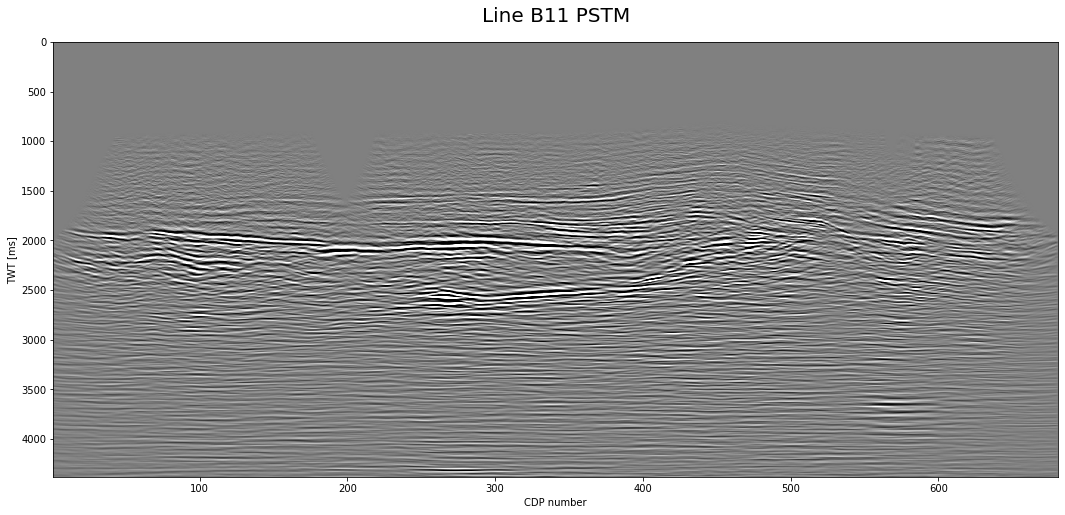

In [0]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, twt[-1], twt[0]]  # define extent
ax.imshow(data.T, cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('TWT [ms]')
ax.set_title('Line B11 PSTM', size=20, pad=20)

Text(0.5, 1.0, 'Line B11 PSDM')

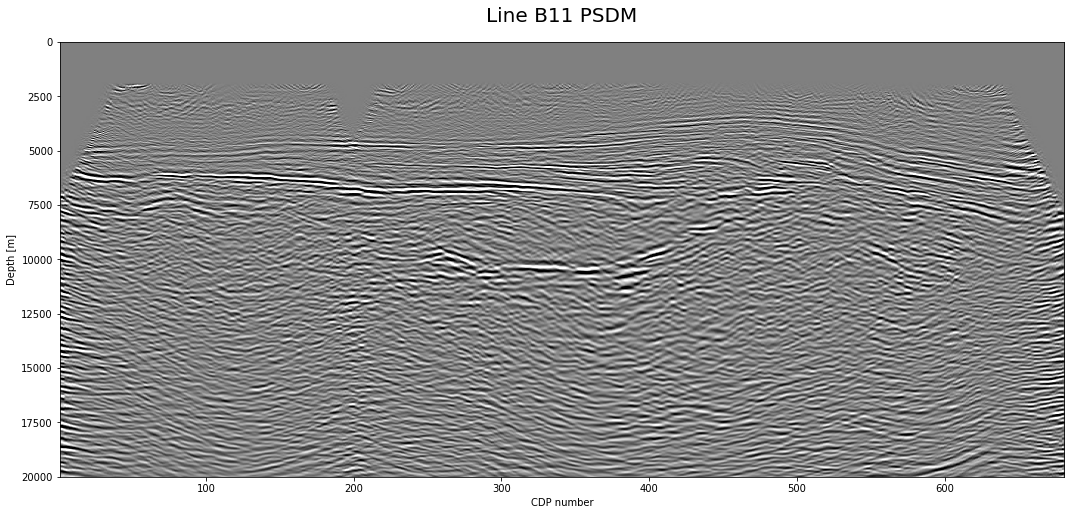

In [0]:
filename = '/content/forge3d/seismic/2018-19 Reflection Processing/Legacy Line 11/Line_L11_PSDM_Enh.segy'

with segyio.open(filename, ignore_geometry=True) as f:
    # Get basic attributes
    n_traces = f.tracecount
    sample_rate = segyio.tools.dt(f) / 1000
    n_samples = f.samples.size
    twt = f.samples
    data = f.trace.raw[:]  # Get all data into memory (could cause on big files)

    clip_percentile = 99
    vm = np.percentile(data, clip_percentile)

fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1, 1, 1)
extent = [1, n_traces, twt[-1], twt[0]]  # define extent
ax.imshow(data.T, cmap="gray", vmin=-vm, vmax=vm, aspect='auto', extent=extent)
ax.set_xlabel('CDP number')
ax.set_ylabel('Depth [m]')
ax.set_title('Line B11 PSDM', size=20, pad=20)